In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
df = pd.read_csv('phone_data.csv', 
                 index_col=0, 
                 infer_datetime_format=True,
                 parse_dates=['date'],
                 dayfirst=True                 
                 )
df.head()


,date,duration,item,month,network,network_type
index,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data
1,2014-10-15 06:58:00,13.000,call,2014-11,Vodafone,mobile
2,2014-10-15 14:46:00,23.000,call,2014-11,Meteor,mobile
3,2014-10-15 14:48:00,4.000,call,2014-11,Tesco,mobile
4,2014-10-15 17:27:00,4.000,call,2014-11,Tesco,mobile


In [5]:
df.dtypes

date            datetime64[ns]
duration               float64
item                    object
month                   object
network                 object
network_type            object
dtype: object

In [23]:
# create the dataframe with mean duration per network
s = df.groupby('network')['duration'].mean()
df_mean_duration = pd.DataFrame(s)
df_mean_duration

,duration
network,
Meteor,83.137931
Tesco,164.773810
Three,170.004651
Vodafone,68.697674
data,34.429000
landline,438.880952
special,1.000000
voicemail,65.740741
world,1.000000


In [12]:
# join both dataframes
df_calls_w_avg = pd.merge(df, df_mean_duration, left_on='network', right_index=True)
df_calls_w_avg.head()

,date,duration_x,item,month,network,network_type,duration_y
index,,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,34.429
6,2014-10-16 06:58:00,34.429,data,2014-11,data,data,34.429
13,2014-10-17 06:58:00,34.429,data,2014-11,data,data,34.429
26,2014-10-18 06:58:00,34.429,data,2014-11,data,data,34.429
39,2014-10-19 06:58:00,34.429,data,2014-11,data,data,34.429


In [13]:
# calculate ratio
df_calls_w_avg['duration_ratio_in_network'] = df_calls_w_avg.duration_x / df_calls_w_avg.duration_y
df_calls_w_avg.head()

,date,duration_x,item,month,network,network_type,duration_y,duration_ratio_in_network
index,,,,,,,,
0,2014-10-15 06:58:00,34.429,data,2014-11,data,data,34.429,1.0
6,2014-10-16 06:58:00,34.429,data,2014-11,data,data,34.429,1.0
13,2014-10-17 06:58:00,34.429,data,2014-11,data,data,34.429,1.0
26,2014-10-18 06:58:00,34.429,data,2014-11,data,data,34.429,1.0
39,2014-10-19 06:58:00,34.429,data,2014-11,data,data,34.429,1.0


In [14]:
# check a network which shows more realistic values than "data"
df_calls_w_avg[df_calls_w_avg['network']=='Vodafone']

,date,duration_x,item,month,network,network_type,duration_y,duration_ratio_in_network
index,,,,,,,,
1,2014-10-15 06:58:00,13.0,call,2014-11,Vodafone,mobile,68.697674,0.189235
17,2014-10-17 17:22:00,1.0,sms,2014-11,Vodafone,mobile,68.697674,0.014557
18,2014-10-17 17:23:00,1.0,sms,2014-11,Vodafone,mobile,68.697674,0.014557
20,2014-10-17 17:29:00,4.0,call,2014-11,Vodafone,mobile,68.697674,0.058226
22,2014-10-17 17:42:00,1.0,sms,2014-11,Vodafone,mobile,68.697674,0.014557
23,2014-10-17 17:44:00,1.0,sms,2014-11,Vodafone,mobile,68.697674,0.014557
24,2014-10-17 17:44:00,1.0,sms,2014-11,Vodafone,mobile,68.697674,0.014557
25,2014-10-17 17:44:00,1.0,sms,2014-11,Vodafone,mobile,68.697674,0.014557
28,2014-10-18 12:06:00,4.0,call,2014-11,Vodafone,mobile,68.697674,0.058226


C:\Users\peer.kueppers\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


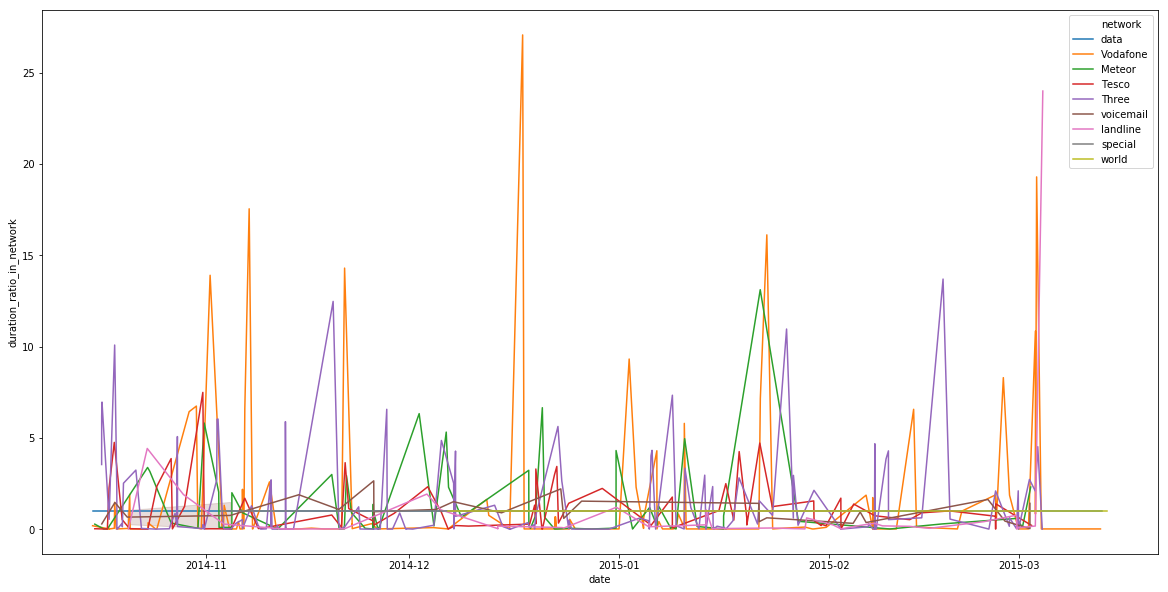

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=df_calls_w_avg.date, 
             y=df_calls_w_avg.duration_ratio_in_network, 
             hue=df_calls_w_avg.network,
             ax=ax)
plt.show()